# **Supervised Learning: Image Classification dengan Convolutional Neural Network (CNN)**

170498071/170498071 [==============================] - 3s 0us/step
Epoch 1/10
1563/1563 [==============================] - 84s 52ms/step - loss: 1.5270 - accuracy: 0.4445 - val_loss: 1.3046 - val_accuracy: 0.5312
Epoch 2/10
1563/1563 [==============================] - 75s 48ms/step - loss: 1.1809 - accuracy: 0.5823 - val_loss: 1.1204 - val_accuracy: 0.6044
Epoch 3/10
1563/1563 [==============================] - 73s 47ms/step - loss: 1.0288 - accuracy: 0.6378 - val_loss: 0.9925 - val_accuracy: 0.6528
Epoch 4/10
1563/1563 [==============================] - 71s 46ms/step - loss: 0.9261 - accuracy: 0.6769 - val_loss: 0.9602 - val_accuracy: 0.6662
Epoch 5/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.8600 - accuracy: 0.6983 - val_loss: 0.9344 - val_accuracy: 0.6764
Epoch 6/10
1563/1563 [==============================] - 71s 45ms/step - loss: 0.7998 - accuracy: 0.7224 - val_loss: 0.9297 - val_accuracy: 0.6789
Epoch 7/10
1563/1563 [==============================] - 7

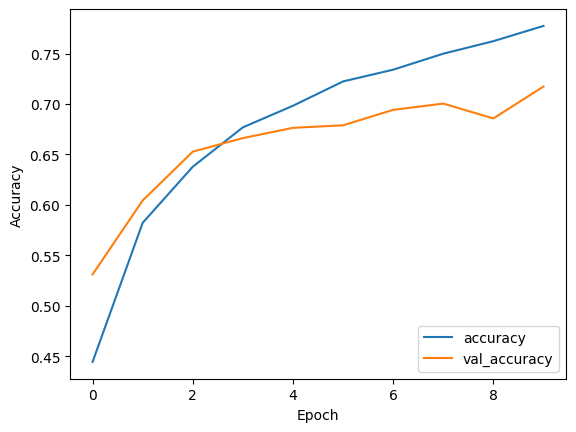

In [6]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load and preprocess dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc:.2f}')

# Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()


# **Unsupervised Learning: Dimensionality Reduction dengan t-SNE dan Clustering dengan DBSCAN**

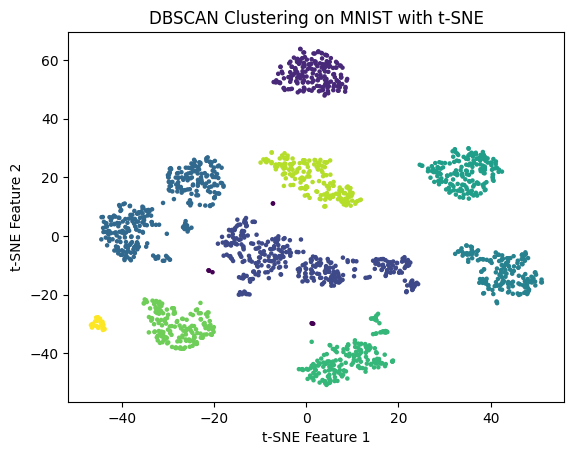

In [7]:
import numpy as np
from sklearn import datasets
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Load dataset
digits = datasets.load_digits()
X = digits.data

# Perform t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=5, min_samples=5)
labels = dbscan.fit_predict(X_tsne)

# Plot the clusters
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='viridis', s=5)
plt.title('DBSCAN Clustering on MNIST with t-SNE')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.show()
